Attributes Information:
Attribute	Description
Age	Age of a patient [years]
Sex	Gender of the patient [M: Male, F: Female]
ChestPain	Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
RestingBP	Blood pressure in Hg (Normal blood pressure - 120/80 Hg)
Cholesterol	Serum cholestrol level in blood (Normal cholesterol level below for adults 200mg/dL)
FastingBS	Fasting Blood Sugar (Normal less than 100mg/dL for non diabetes for diabetes 100-125mg/dL)
RestingECG	Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
MaxHR	Maximum heart rate achieved [Numeric value between 60 and 202]
ExerciseAngina	Exercise-induced angina [Y: Yes, N: No]
Oldpeak	oldpeak = ST [Numeric value measured in depression]
ST_Slope	The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
HeartDisease	output class [1: heart disease, 0: Normal]

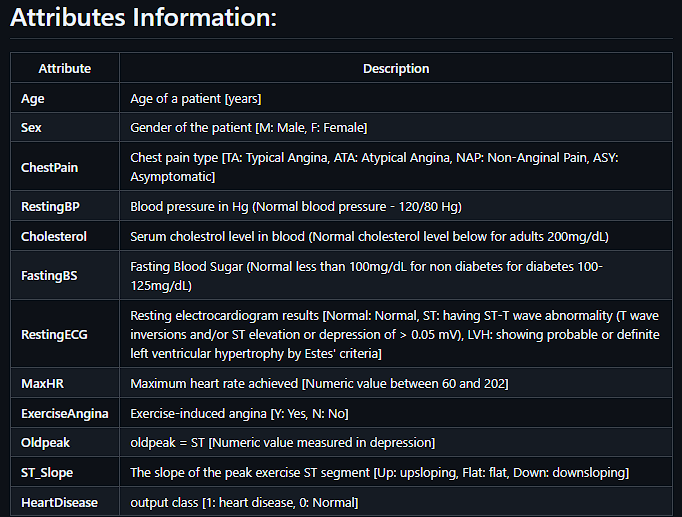

In [1]:
import pandas as pd

# Load the uploaded Heart Disease dataset
file_path = 'heart.csv'
heart_data = pd.read_csv(file_path)

# Display the first few rows to understand its structure
heart_data.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


 columns:

age: Age of the patient.

sex: Gender (1 = male, 0 = female).

cp: Chest pain type (4 values).

trestbps: Resting blood pressure (mm Hg).

chol: Serum cholesterol (mg/dl).

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false).

restecg: Resting electrocardiographic results (values 0, 1, 2).

thalach: Maximum heart rate achieved.

exang: Exercise-induced angina (1 = yes, 0 = no).

oldpeak: ST depression induced by exercise relative to rest.

slope: Slope of the peak exercise ST segment.

ca: Number of major vessels (0–3) colored by fluoroscopy.

thal: Thalassemia (0 = normal, 1 = fixed defect, 2 = reversible defect).

target: Presence of heart disease (0 = no disease, 1 = disease).

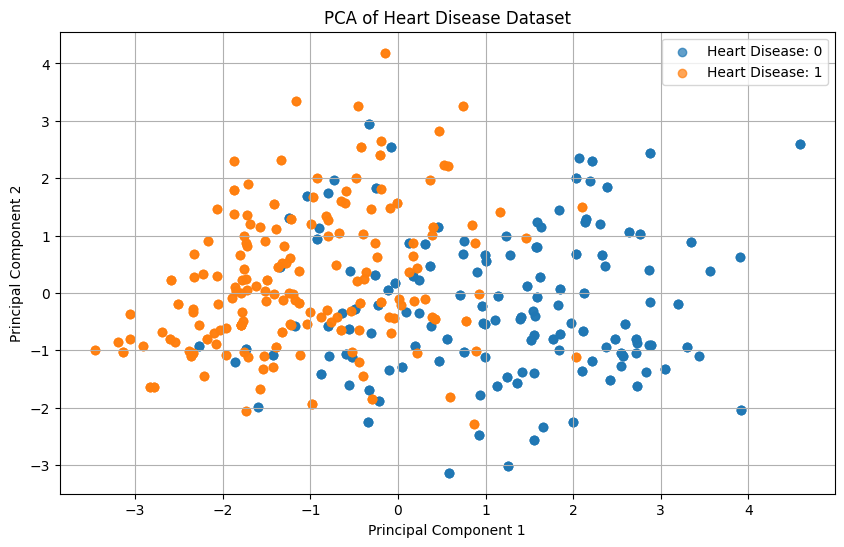

array([0.21369912, 0.11971959])

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Selecting features for PCA (excluding the target variable)
features = heart_data.drop(columns=['target'])

# Scaling the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Applying PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
principal_components = pca.fit_transform(scaled_features)

# Creating a DataFrame for the PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['target'] = heart_data['target']

# Visualizing PCA results
plt.figure(figsize=(10, 6))
for label, color in zip([0, 1], ['blue', 'red']):
    subset = pca_df[pca_df['target'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=f"Heart Disease: {label}", alpha=0.7)

plt.title('PCA of Heart Disease Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

# Display the explained variance ratio
pca_explained_variance = pca.explained_variance_ratio_
pca_explained_variance


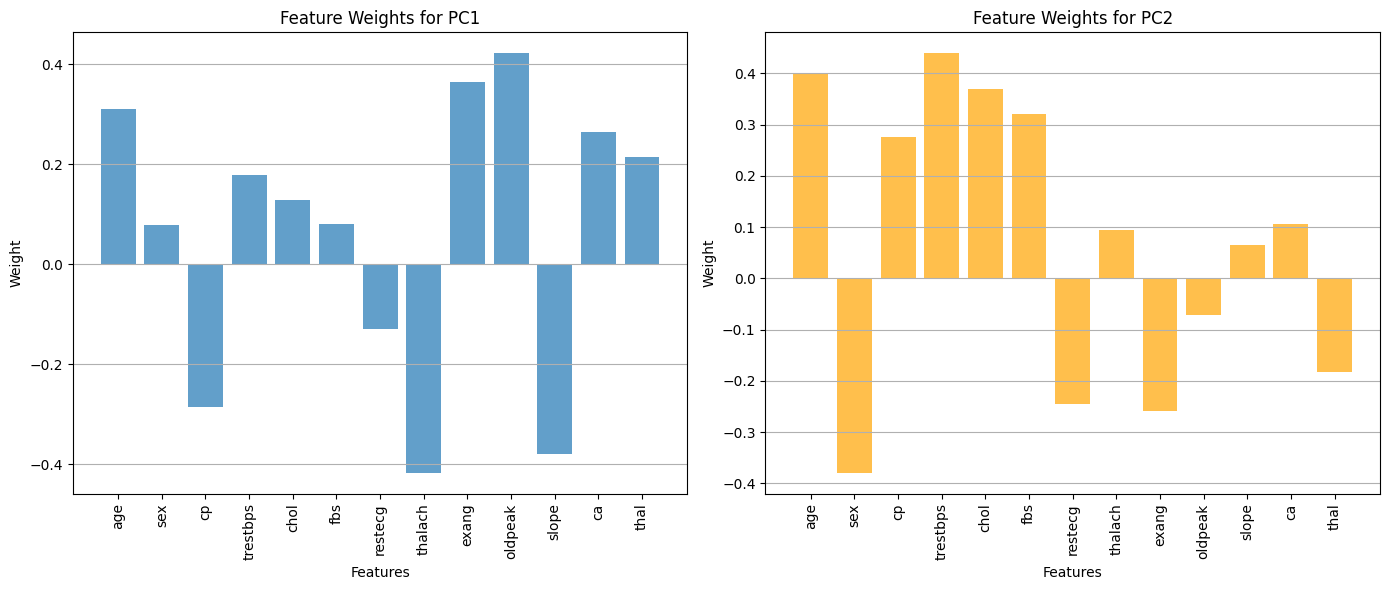

In [5]:
# Visualizing the PCA feature weights (loadings) for PC1 and PC2
plt.figure(figsize=(14, 6))

# Bar chart for PC1
plt.subplot(1, 2, 1)
plt.bar(pca_components.columns, pca_components.loc['PC1'], alpha=0.7)
plt.title('Feature Weights for PC1')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.grid(axis='y')

# Bar chart for PC2
plt.subplot(1, 2, 2)
plt.bar(pca_components.columns, pca_components.loc['PC2'], alpha=0.7, color='orange')
plt.title('Feature Weights for PC2')
plt.xlabel('Features')
plt.ylabel('Weight')
plt.xticks(rotation=90)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


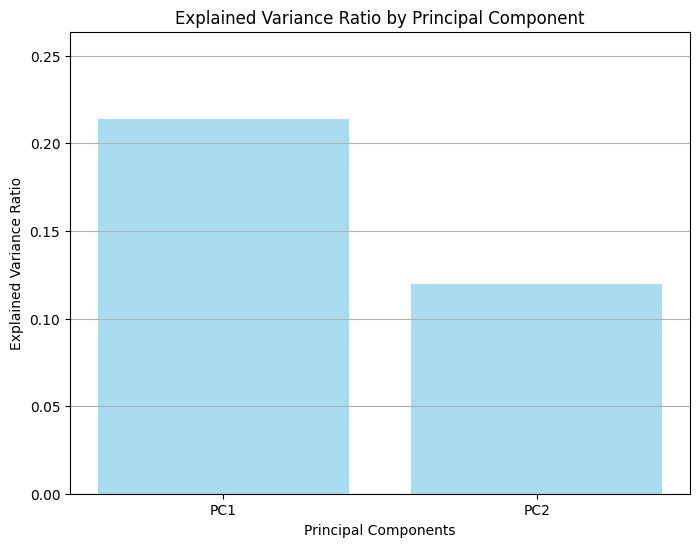

In [6]:
# Plotting the explained variance ratio against the principal components
plt.figure(figsize=(8, 6))
components = ['PC1', 'PC2']
plt.bar(components, pca.explained_variance_ratio_, color='skyblue', alpha=0.7)
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.ylim(0, max(pca.explained_variance_ratio_) + 0.05)
plt.grid(axis='y')

plt.show()


In [8]:
# Calculating the absolute contributions of each feature to PC1 and PC2
# The absolute value indicates the magnitude of contribution regardless of direction
feature_contributions = pca_components.abs()

# Summing contributions across all principal components for each feature
total_feature_contributions = feature_contributions.sum(axis=0)

# Normalizing contributions to get percentages
normalized_contributions = (total_feature_contributions / total_feature_contributions.sum()) * 100

# Creating a DataFrame for clarity
feature_contribution_df = pd.DataFrame({
    'Feature': feature_contributions.columns,
    'Contribution (%)': normalized_contributions
}).sort_values(by='Contribution (%)', ascending=False)

# Saving the results as a CSV file
contribution_file_path = "Feature_PCA_Contributions.csv"
feature_contribution_df.to_csv(contribution_file_path, index=False)

# Display the top contributors
feature_contribution_df.head(), contribution_file_path


(           Feature  Contribution (%)
 age            age         10.964619
 exang        exang          9.642136
 trestbps  trestbps          9.567573
 cp              cp          8.683028
 thalach    thalach          7.912192,
 'Feature_PCA_Contributions.csv')